In [1]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from itertools import cycle, islice
import math

In [2]:
df = pd.read_csv('df_clean.csv')

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,fullVisitorId,channelGrouping,date,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,...,sessionQualityDim,timeOnSite,transactions,transactionRevenue,totalTransactionRevenue,source,weekday,day,month,year
0,461840188517261,Organic Search,2018-04-11,1523458419,1,1.523458e+09,Chrome,Windows,False,desktop,...,1.0,0,0,0,0,google,2,11,4,2018
1,650183049109374,Organic Search,2017-06-01,1496340796,1,1.496341e+09,Chrome,Android,True,mobile,...,0.0,211,0,0,0,google,3,1,6,2017
2,679030251760221,Organic Search,2016-09-18,1474198386,3,1.474198e+09,Edge,Windows,False,desktop,...,0.0,0,0,0,0,google,6,18,9,2016
3,750929315523353,Organic Search,2017-02-03,1486157741,1,1.486158e+09,Safari,Macintosh,False,desktop,...,0.0,0,0,0,0,(direct),4,3,2,2017
4,3237279499166974,Referral,2018-03-03,1520086654,1,1.520087e+09,Chrome,Macintosh,False,desktop,...,1.0,79,0,0,0,qiita.com,5,3,3,2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82707 entries, 0 to 82706
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            82707 non-null  object 
 1   channelGrouping          82707 non-null  object 
 2   date                     82707 non-null  object 
 3   visitId                  82707 non-null  int64  
 4   visitNumber              82707 non-null  int64  
 5   visitStartTime           82707 non-null  float64
 6   browser                  82706 non-null  object 
 7   operatingSystem          82044 non-null  object 
 8   isMobile                 82707 non-null  bool   
 9   deviceCategory           82707 non-null  object 
 10  continent                82594 non-null  object 
 11  subContinent             82594 non-null  object 
 12  country                  82707 non-null  object 
 13  hits_y                   82707 non-null  int64  
 14  pageviews             

In [5]:
df['pageviews'] = df['pageviews'].astype(int)
df['newVisits'] = df['newVisits'].astype(int)
df['bounces'] = df['bounces'].astype(int)
df['hits_y'] = df['hits_y'].astype(int)
df['sessionQualityDim'] = df['sessionQualityDim'].astype(int)
df['timeOnSite'] = df['timeOnSite'].astype(int)
df['transactions'] = df['transactions'].astype(int)
df['transactionRevenue'] = df['transactionRevenue'].astype(int)
df['totalTransactionRevenue'] = df['totalTransactionRevenue'].astype(int)
df['fullVisitorId'] = df['fullVisitorId'].astype(str)
df['visitId'] = df['visitId'].astype(str)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [6]:
df['isMobile'] = df['isMobile'].replace(True, 1)
df['isMobile'] = df['isMobile'].replace(False, 0)

In [77]:
df['browser'].replace(['YaBrowser', 'Amazon Silk', 'Coc Coc', 'Android Browser', 'Mozilla Compatible Agent', 'Maxthon', 'BlackBerry',
            'Puffin', 'Nintendo Browser', 'MRCHROME', 'Nokia Browser', 'SeaMonkey', 'osee2unifiedRelease',
            'LYF_LS_4002_12', 'Seznam', 'Playstation Vita Browser', 'Mozilla', 'bsfnwveckhgpdoyjxmizruqtla',
            'lpmqaxwbzyteokrfusnjhvdigc', 'DESKTOP', 'no-ua', 'Iron', ';__CT_JOB_ID__:6e9dcf2f-f58f-4938-91e3-77e00868177b;',
            'lhkbrtuwomdeafnqygvxcspizj', 'efkaxnbyohqtspzlvcwrjmigdu', 'HTC802t_TD', 'Nichrome',
            'ighfsbrmpoctzjqxlywdenvuka', 'Browser', np.nan], 'Other', inplace=True)

In [78]:
df['operatingSystem'].replace(['Windows Phone', 'Samsung', 'Tizen', 'OS/2', 'Nintendo Wii', 'Firefox OS', 'Xbox', 
                               'Playstation Vita', 'Nintendo 3DS', np.nan], 'Other', inplace = True)

In [79]:
mask = df.source.map(df.source.value_counts()) < 200
df.source =  df.source.mask(mask, 'Other')
df['source'].replace([np.nan], 'Other', inplace = True)
df['source'].value_counts()

google                  31888
(direct)                26970
youtube.com             16513
Other                    2001
analytics.google.com     1786
Partners                 1575
sites.google.com          471
google.com                454
m.facebook.com            304
dfa                       288
baidu                     241
reddit.com                216
Name: source, dtype: int64

In [80]:
mask = df.subContinent.map(df.subContinent.value_counts()) < 200
df.subContinent =  df.subContinent.mask(mask, 'Other')
df['subContinent'].replace([np.nan], 'Other', inplace = True)
df['subContinent'].value_counts()

Northern America    36897
Southern Asia        5990
Southeast Asia       5911
Western Europe       5443
Northern Europe      5406
Eastern Asia         4389
Eastern Europe       3724
South America        3607
Southern Europe      3274
Western Asia         2995
Central America      1452
Australasia          1340
Northern Africa       849
Western Africa        379
Southern Africa       306
Other                 280
Eastern Africa        243
Caribbean             222
Name: subContinent, dtype: int64

In [81]:
mask = df.country.map(df.country.value_counts()) < 200
df.country =  df.country.mask(mask, 'Other')
df['country'].replace([np.nan], 'Other', inplace = True)
df['country'].value_counts()

United States           34438
India                    5161
Other                    4701
United Kingdom           3505
Canada                   2450
Germany                  1773
Brazil                   1752
Vietnam                  1746
Japan                    1731
France                   1506
Turkey                   1443
Thailand                 1429
Taiwan                   1290
Mexico                   1237
Australia                1130
Spain                    1112
Netherlands              1046
Italy                    1033
Russia                   1018
Poland                    810
Indonesia                 782
Philippines               721
Singapore                 613
Ireland                   601
South Korea               571
Malaysia                  527
Argentina                 488
Ukraine                   480
Sweden                    465
Romania                   444
Belgium                   443
Colombia                  433
Israel                    428
Hong Kong 

In [83]:
df['continent'].replace([np.nan], 'Other', inplace = True)

In [9]:
df.dtypes

fullVisitorId                      object
channelGrouping                    object
date                       datetime64[ns]
visitId                            object
visitNumber                         int64
visitStartTime                    float64
browser                            object
operatingSystem                    object
isMobile                          float64
deviceCategory                     object
continent                          object
subContinent                       object
country                            object
hits_y                              int64
pageviews                           int64
bounces                             int64
newVisits                           int64
sessionQualityDim                   int64
timeOnSite                          int64
transactions                        int64
transactionRevenue                  int64
totalTransactionRevenue             int64
source                             object
weekday                           

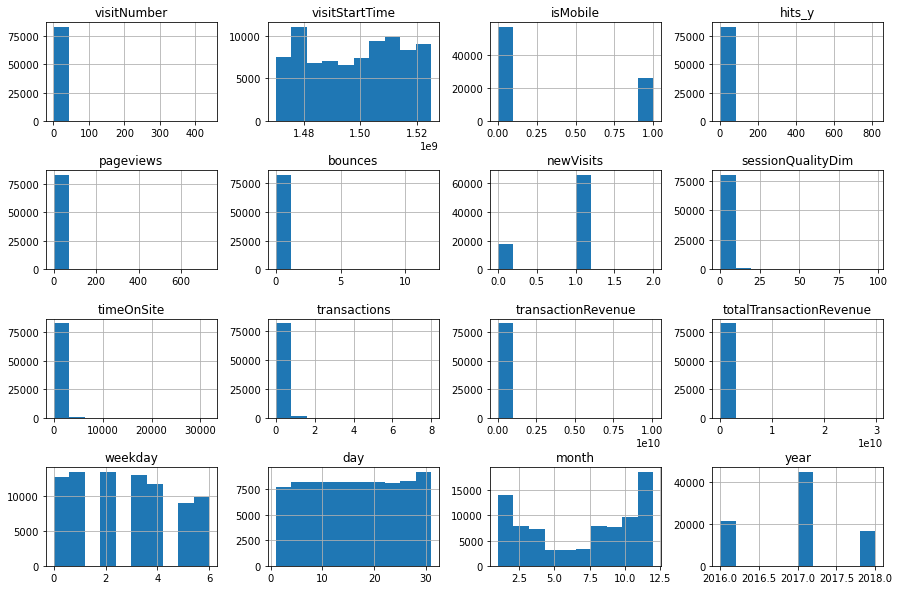

In [10]:
# All histograms
df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

In [11]:
df_none_zero = df[df['totalTransactionRevenue'] > 0]

In [12]:
df['totalTransactionRevenue'].describe()

count    8.270700e+04
mean     1.814703e+06
std      1.074171e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.978760e+10
Name: totalTransactionRevenue, dtype: float64

In [13]:
df_none_zero['totalTransactionRevenue'].describe()

count    9.540000e+02
mean     1.573256e+08
std      9.883676e+08
min      2.990000e+06
25%      2.799000e+07
50%      4.999500e+07
75%      1.059975e+08
max      2.978760e+10
Name: totalTransactionRevenue, dtype: float64

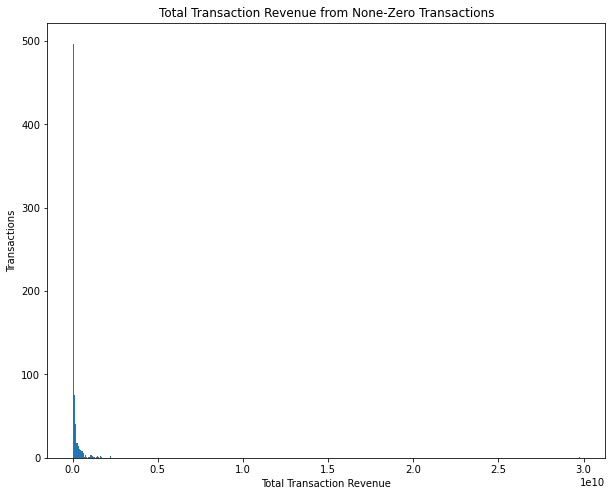

In [14]:
# Total Transaction Revenue from None-Zero Transactions
w = 50000000
n = math.ceil((df['totalTransactionRevenue'].max() - df['totalTransactionRevenue'].min())/w)
plt.figure(figsize=(10, 8))
plt.hist(df_none_zero['totalTransactionRevenue'], bins = n)
plt.title('Total Transaction Revenue from None-Zero Transactions')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Transactions');

In [15]:
df['transactionRevenue'].describe()

count    8.270700e+04
mean     1.437810e+06
std      4.373883e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.009855e+10
Name: transactionRevenue, dtype: float64

In [16]:
df_none_zero['transactionRevenue'].describe()

count    9.540000e+02
mean     1.246509e+08
std      3.881394e+08
min      1.500000e+06
25%      2.199000e+07
50%      4.479000e+07
75%      9.907500e+07
max      1.009855e+10
Name: transactionRevenue, dtype: float64

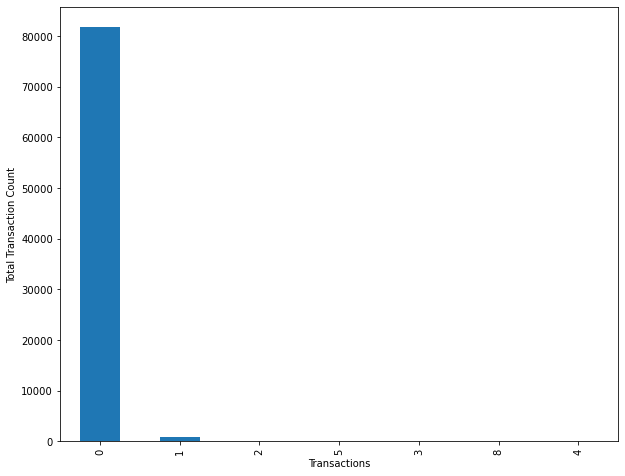

In [17]:
# Total Transactions count from all Transactions
plt.figure(figsize=(10,8))
df.groupby('transactions')['totalTransactionRevenue'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Transaction Count')
plt.xlabel('Transactions');

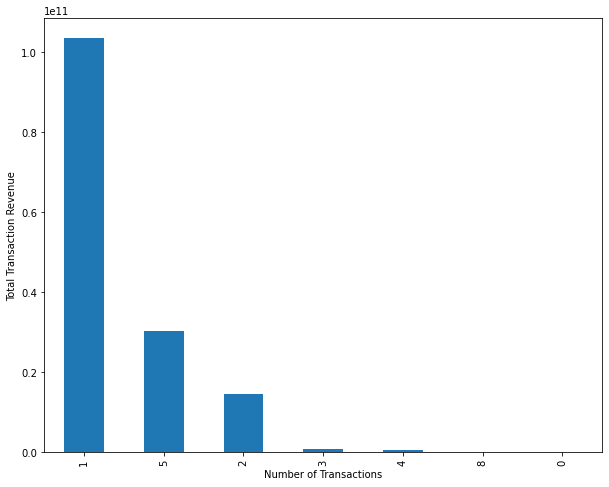

In [18]:
# Total Transaction Revenue from all Transactions
plt.figure(figsize=(10,8))
df.groupby('transactions')['totalTransactionRevenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Transaction Revenue')
plt.xlabel('Number of Transactions');

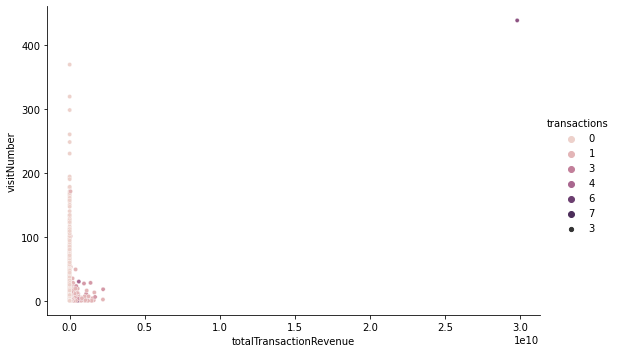

In [19]:
# Transaction revenue and visitnumber scatterplot sorted by transactions
sns.relplot(data=df, x='totalTransactionRevenue', y='visitNumber', hue='transactions', size=3, aspect=1.5);

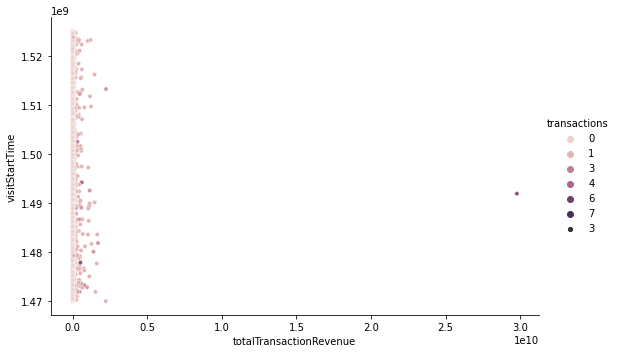

In [20]:
# Transaction revenue and visitStartTime scatterplot sorted by transactions
sns.relplot(data=df, x='totalTransactionRevenue', y='visitStartTime', hue='transactions', size=3, aspect=1.5);

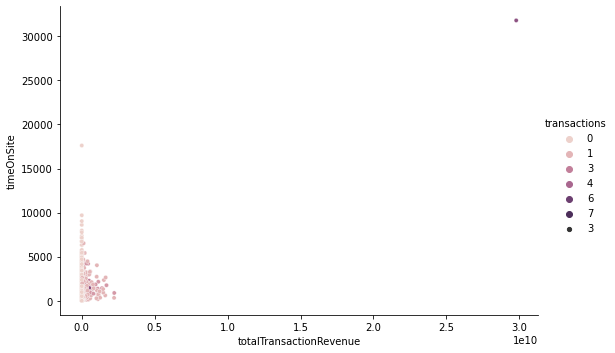

In [21]:
# Transaction revenue and timeOnSite scatterplot sorted by transactions
sns.relplot(data=df, x='totalTransactionRevenue', y='timeOnSite', hue='transactions', size=3, aspect=1.5);

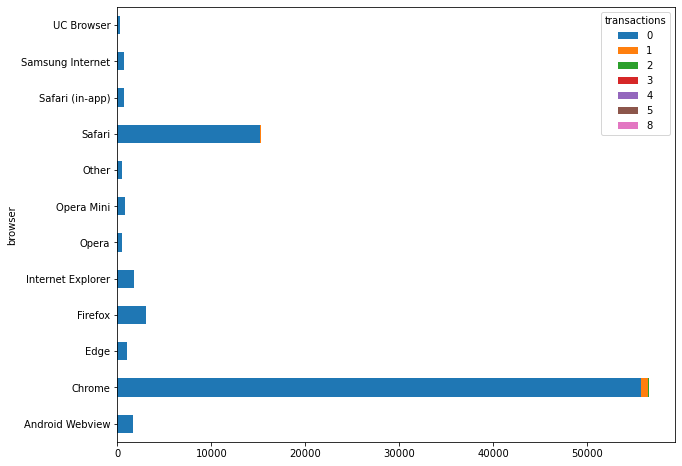

In [22]:
# Transaction count for all Transactions by browser
df_grouped = df.groupby(['browser', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

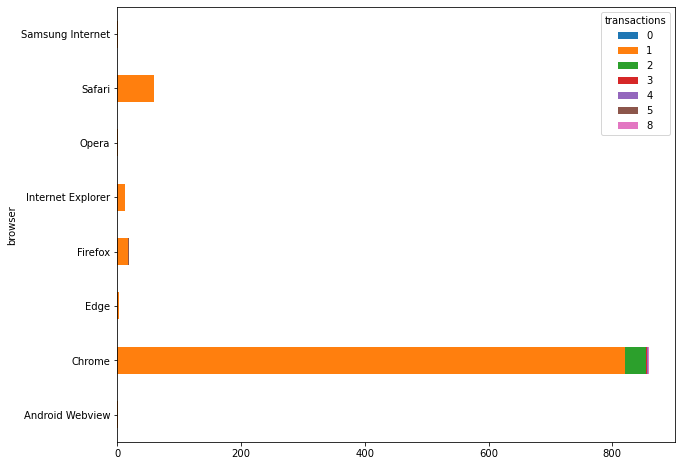

In [23]:
# Transaction count for none zero transactions revenue by Browser
df_grouped = df_none_zero.groupby(['browser', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

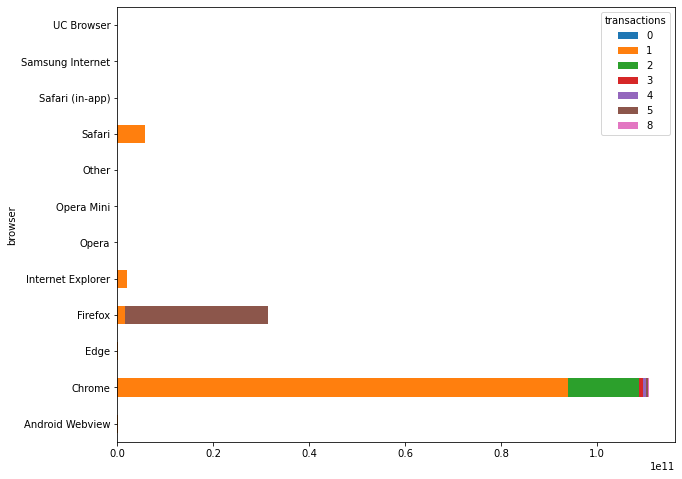

In [24]:
# Transaction revenue by browser
df_grouped = df.groupby(['browser', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

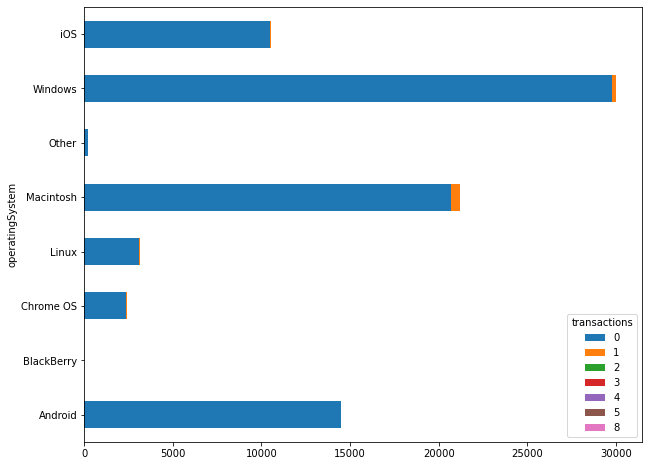

In [25]:
# Transaction count for all Transactions by operating system
df_grouped = df.groupby(['operatingSystem', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

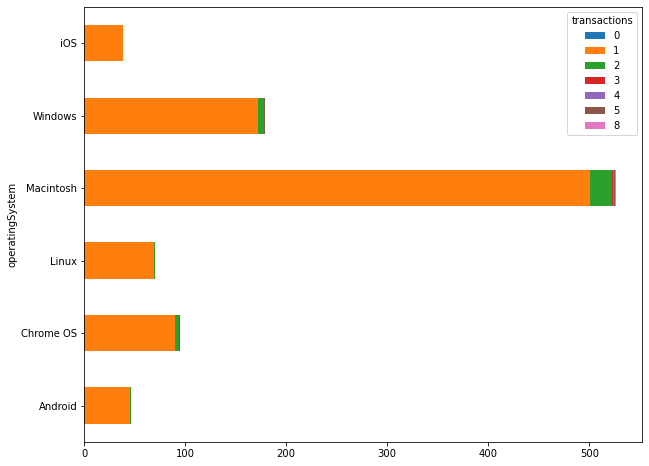

In [26]:
# Transaction count for none zero Transactions by operating system
df_grouped = df_none_zero.groupby(['operatingSystem', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

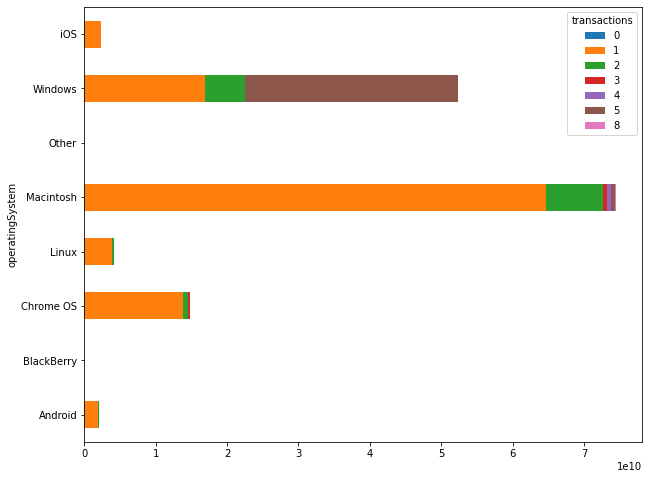

In [27]:
# Transaction revenue by browser
df_grouped = df.groupby(['operatingSystem', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

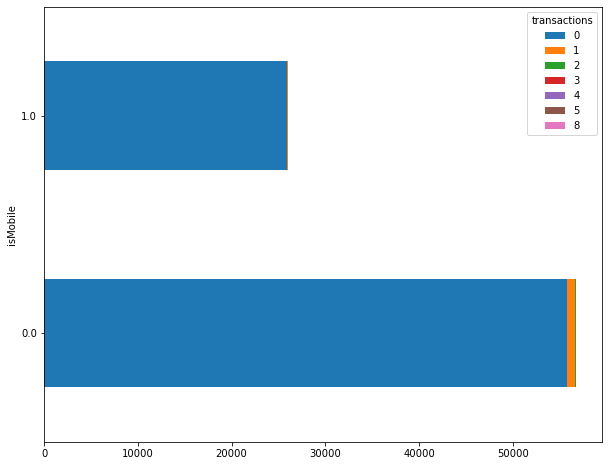

In [28]:
# Transaction count for all Transactions by 'isMobile'
df_grouped = df.groupby(['isMobile', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

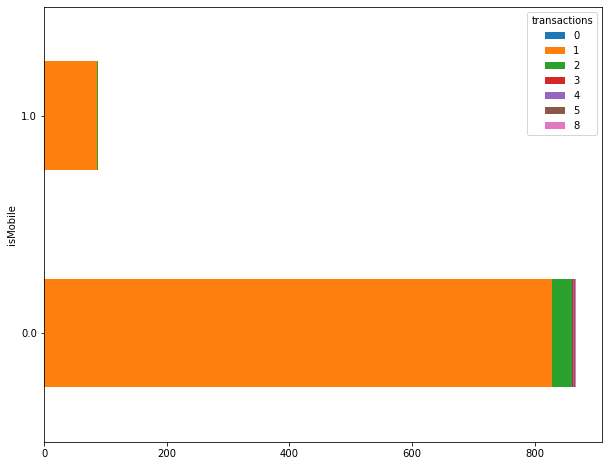

In [29]:
# Transaction count for none zero Transactions by 'isMobile'
df_grouped = df_none_zero.groupby(['isMobile', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

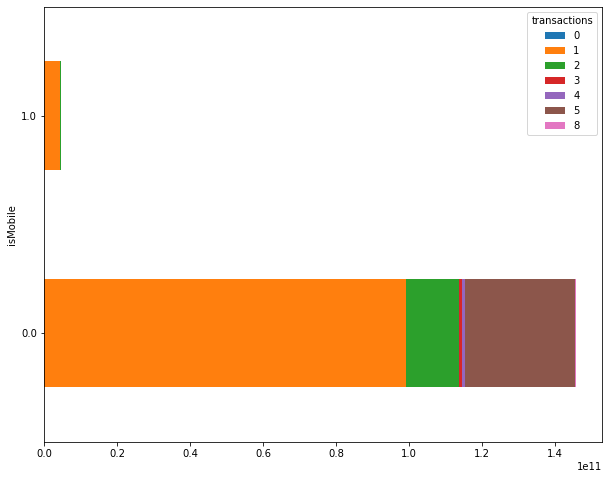

In [30]:
# Transaction revenue by 'isMobile'
df_grouped = df.groupby(['isMobile', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

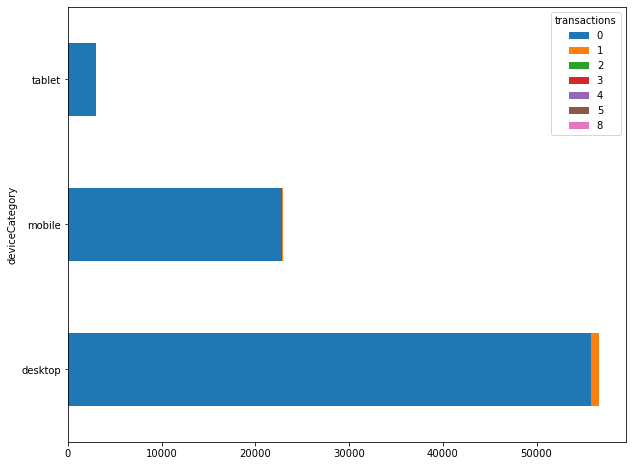

In [31]:
# Transaction count for all Transactions by 'deviceCategory'
df_grouped = df.groupby(['deviceCategory', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

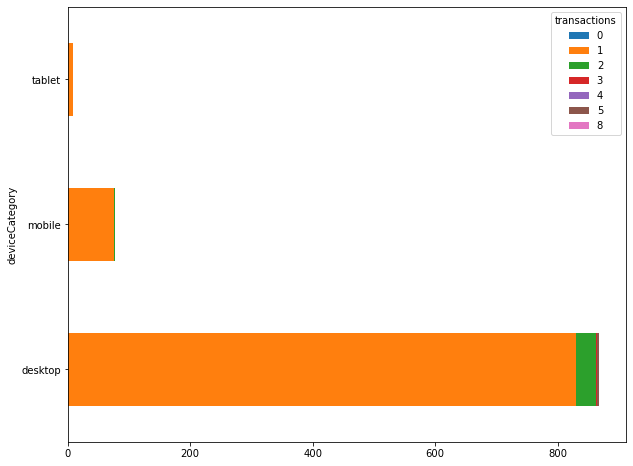

In [32]:
# Transaction count for none zero Transactions by 'deviceCategory'
df_grouped = df_none_zero.groupby(['deviceCategory', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

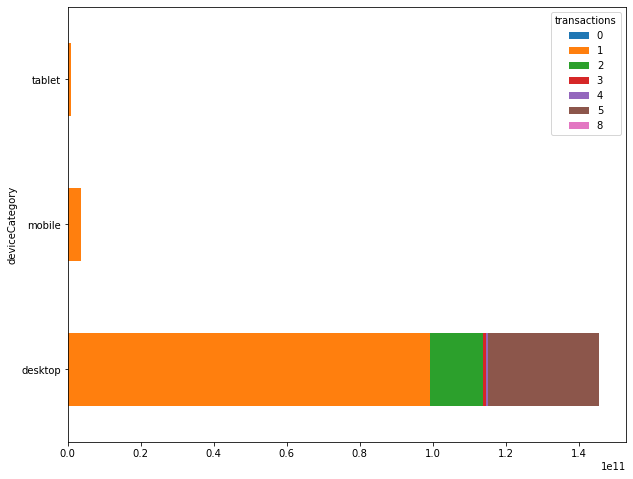

In [33]:
# Transaction revenue by 'deviceCategory'
df_grouped = df.groupby(['deviceCategory', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

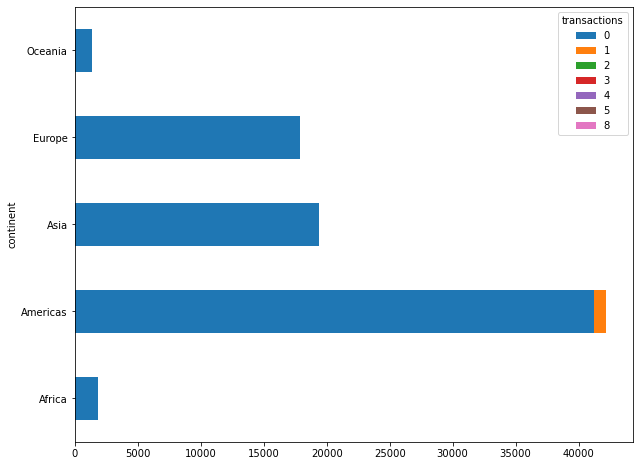

In [34]:
# Transaction count for all Transactions by 'continent'
df_grouped = df.groupby(['continent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

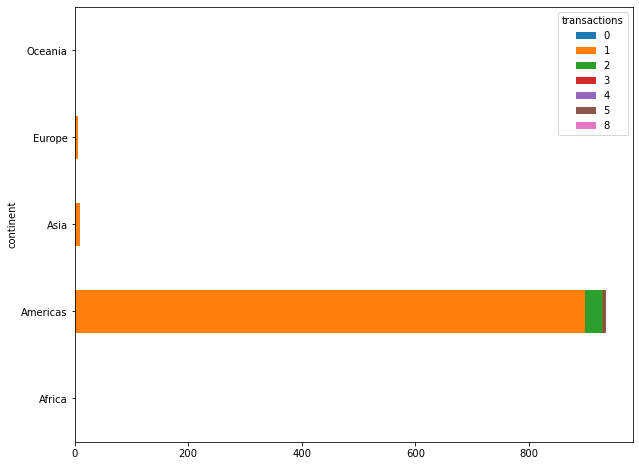

In [35]:
# Transaction count for none zero Transactions by 'continent'
df_grouped = df_none_zero.groupby(['continent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

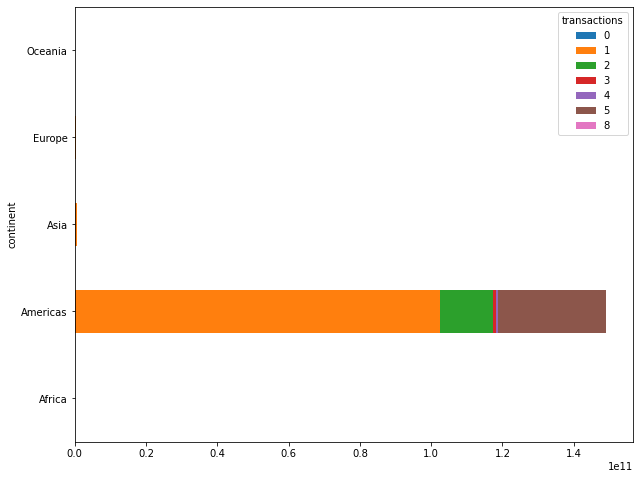

In [36]:
# Transaction revenue by 'continent'
df_grouped = df.groupby(['continent', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

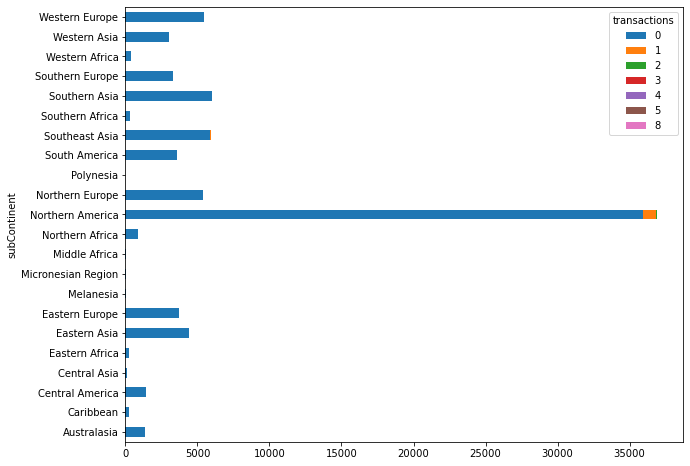

In [37]:
# Transaction count for all Transactions by 'subContinent'
df_grouped = df.groupby(['subContinent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8),  stacked=True);

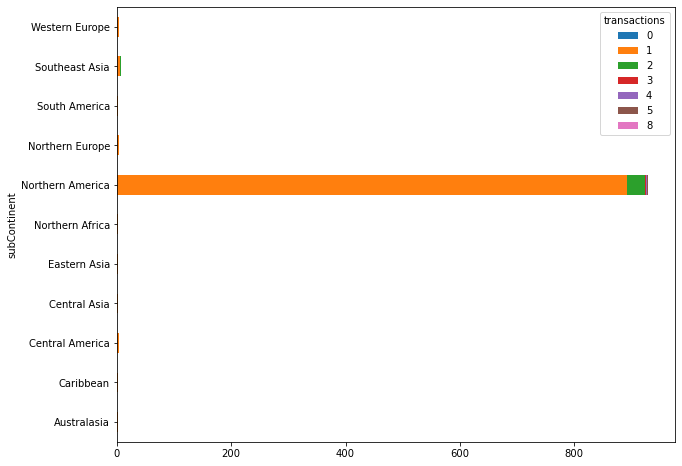

In [38]:
# Transaction count for none zero Transactions by 'subContinent'
df_grouped = df_none_zero.groupby(['subContinent', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

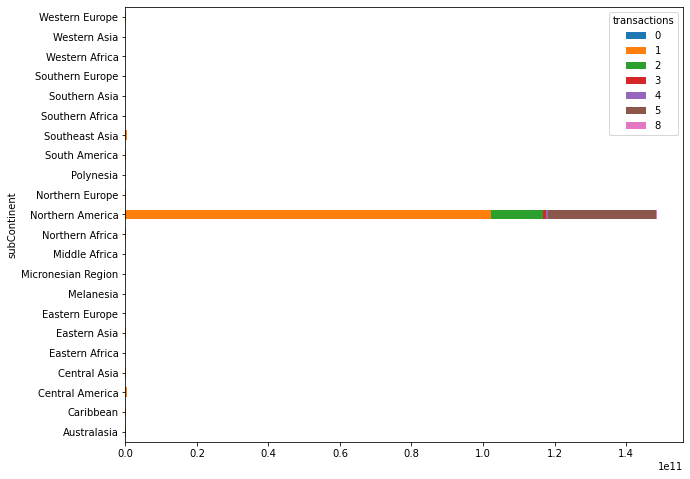

In [39]:
# Transaction revenue by 'subContinent'
df_grouped = df.groupby(['subContinent', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

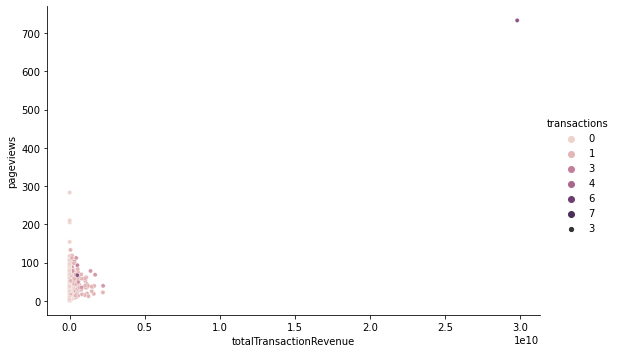

In [40]:
# Transaction revenue and pageviews scartterplot sorted by transactions
sns.relplot(data=df, x='totalTransactionRevenue', y='pageviews', hue='transactions', size=3, aspect=1.5);

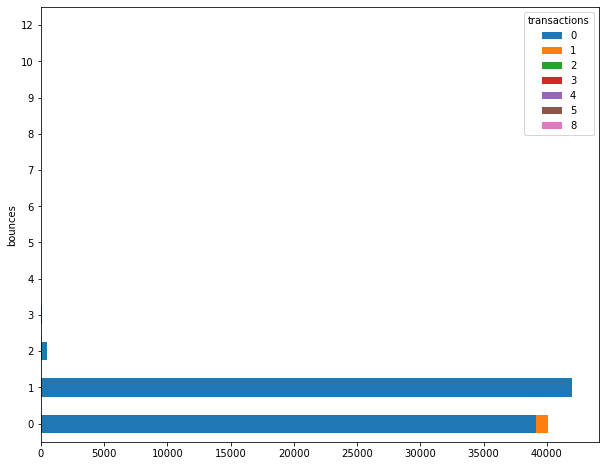

In [41]:
# Transaction count for all Transactions by 'bounces'
df_grouped = df.groupby(['bounces', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

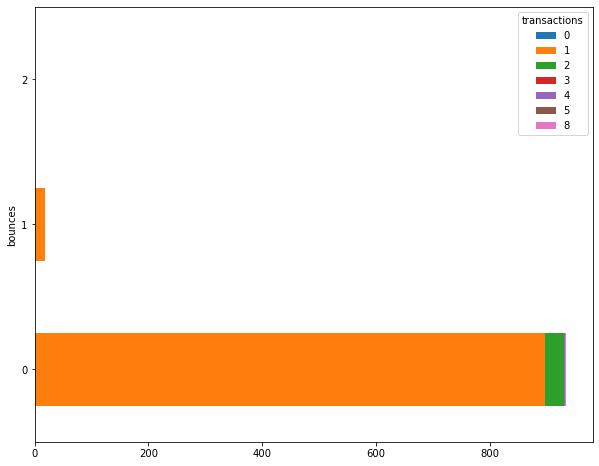

In [42]:
# Transaction count for none zero Transactions by 'bounces'
df_grouped = df_none_zero.groupby(['bounces', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

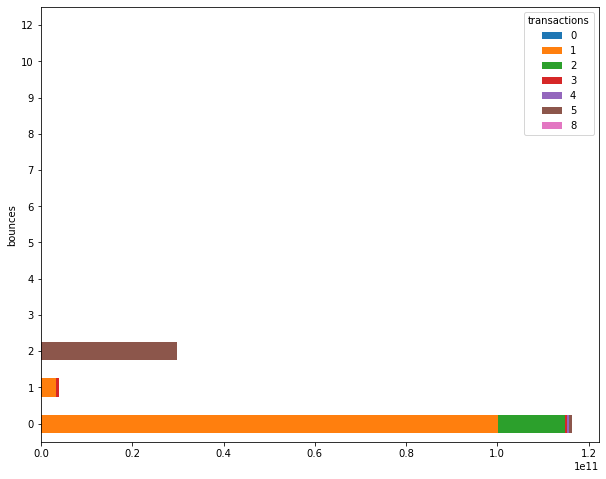

In [43]:
# Transaction revenue by 'bounces'
df_grouped = df.groupby(['bounces', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

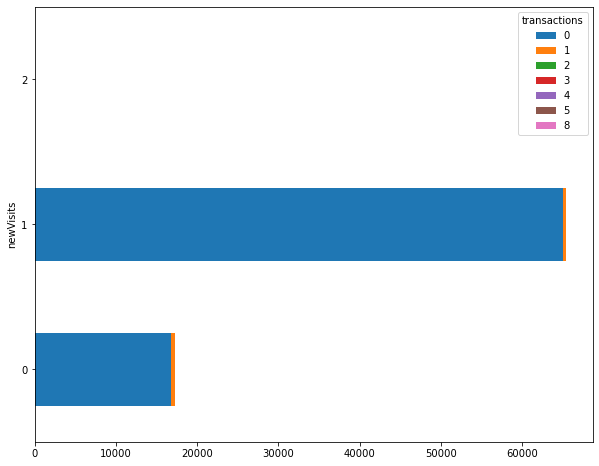

In [44]:
# Transaction count for all Transactions by 'newVisits'
df_grouped = df.groupby(['newVisits', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

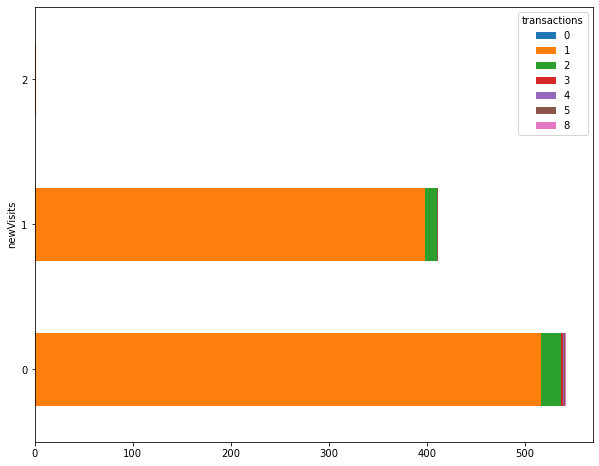

In [45]:
# Transaction count for none zero Transactions by ''newVisits'
df_grouped = df_none_zero.groupby(['newVisits', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

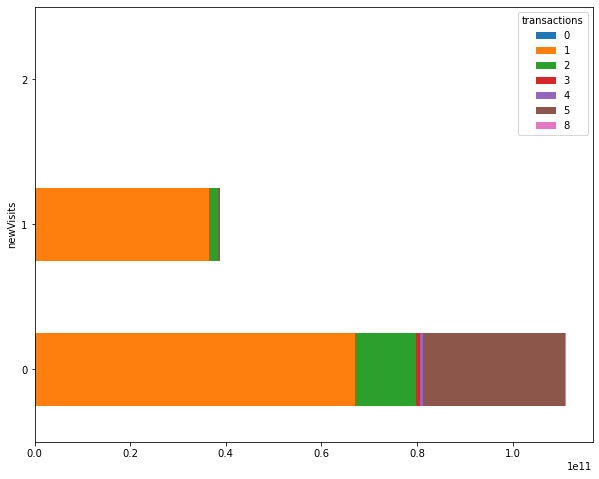

In [46]:
# Transaction revenue by 'newVisits'
df_grouped = df.groupby(['newVisits', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

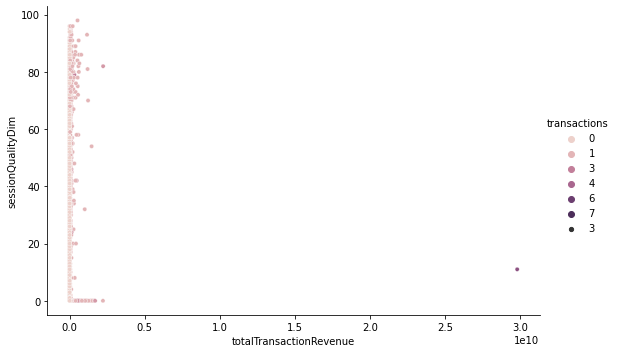

In [47]:
# Transaction revenue and pageviews scatterpolt sorted by transactions
sns.relplot(data=df, x='totalTransactionRevenue', y='sessionQualityDim', hue='transactions', size=3, aspect=1.5);

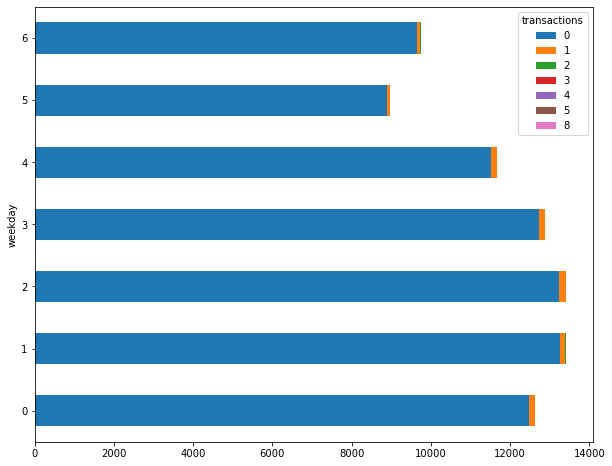

In [48]:
# Transaction count for all Transactions by 'weekday'
df_grouped = df.groupby(['weekday', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

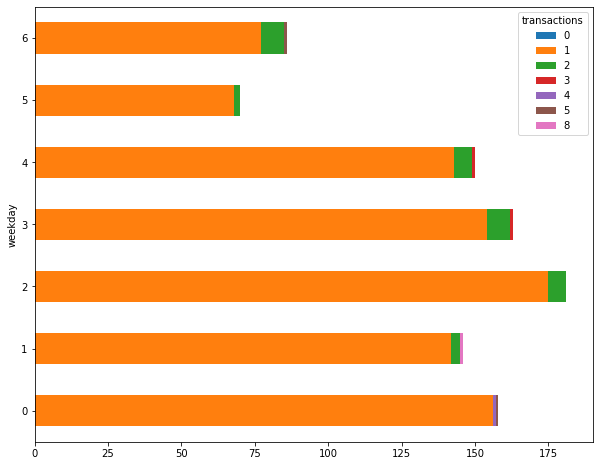

In [49]:
# Transaction count for none zero Transactions by ''weekday'
df_grouped = df_none_zero.groupby(['weekday', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

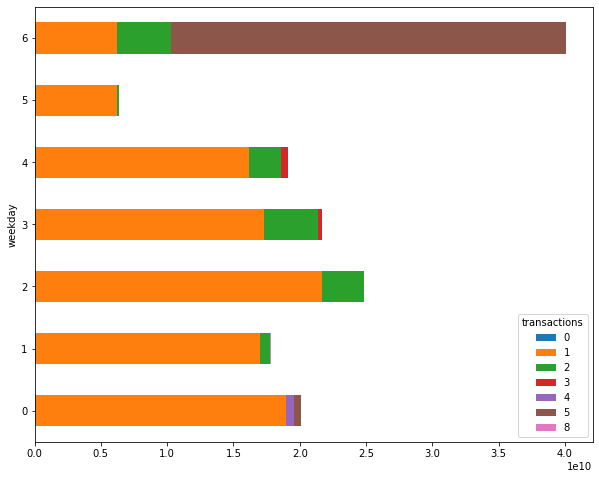

In [50]:
# Transaction revenue by 'weekday'
df_grouped = df.groupby(['weekday', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

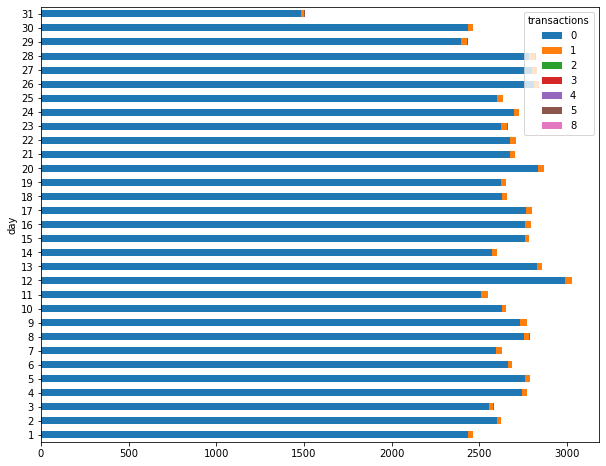

In [51]:
# Transaction count for all Transactions by 'day'
df_grouped = df.groupby(['day', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

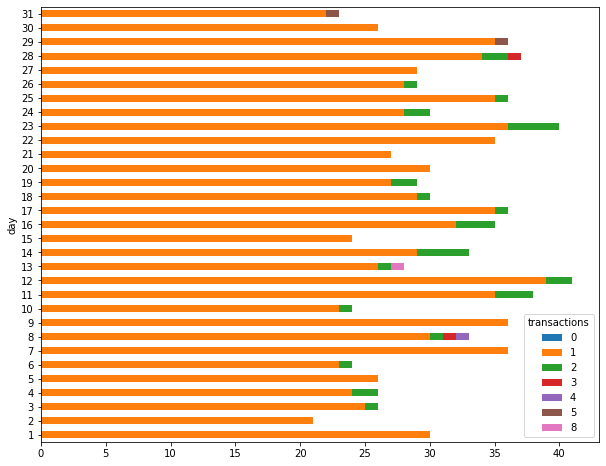

In [52]:
# Transaction count for none zero Transactions by 'day'
df_grouped = df_none_zero.groupby(['day', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

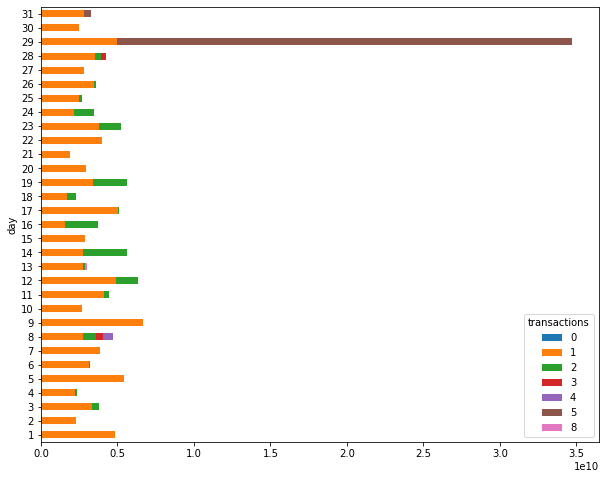

In [53]:
# Transaction revenue by 'day'
df_grouped = df.groupby(['day', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

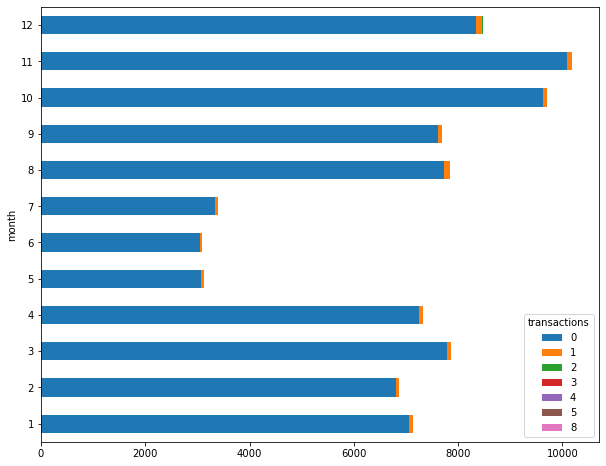

In [54]:
# Transaction count for all Transactions by 'month'
df_grouped = df.groupby(['month', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

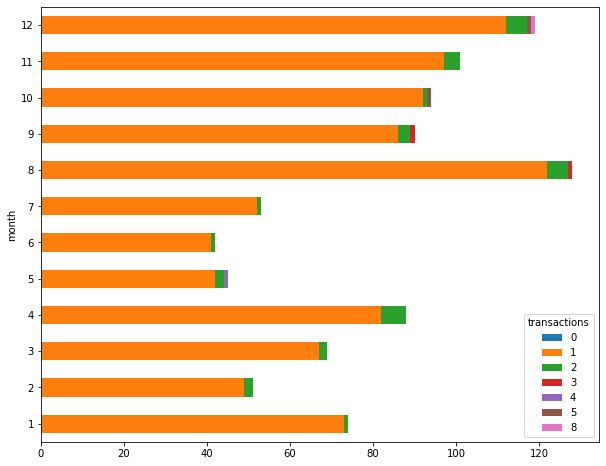

In [55]:
# Transaction count for none zero Transactions by 'month'
df_grouped = df_none_zero.groupby(['month', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

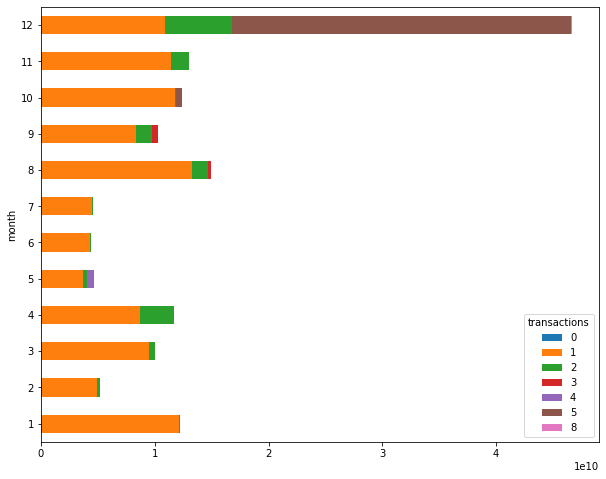

In [56]:
# Transaction revenue by 'month'
df_grouped = df.groupby(['month', 'transactions'])['totalTransactionRevenue'].sum().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

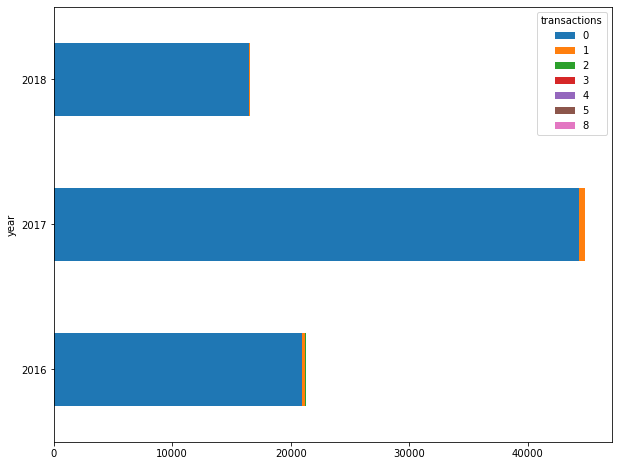

In [57]:
# Transaction count for all Transactions by 'year'
df_grouped = df.groupby(['year', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

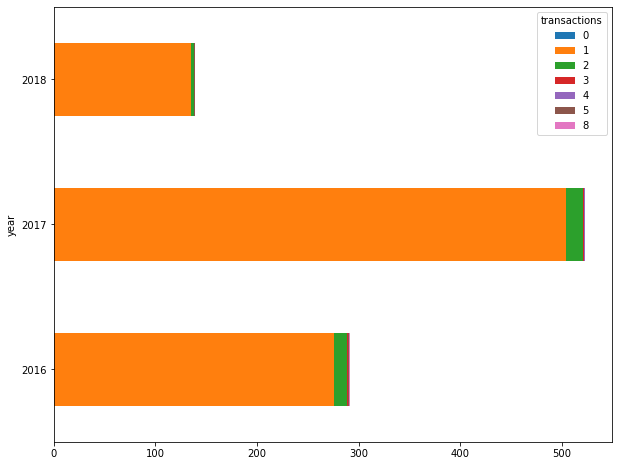

In [58]:
# Transaction count for none zero Transactions by 'year'
df_grouped = df_none_zero.groupby(['year', 'transactions'])['totalTransactionRevenue'].count().unstack()
df_grouped[0]= 0
df_grouped = df_grouped[[0, 1, 2, 3, 4, 5, 8]]
df_grouped.plot(kind='barh', figsize=(10, 8), stacked=True);

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

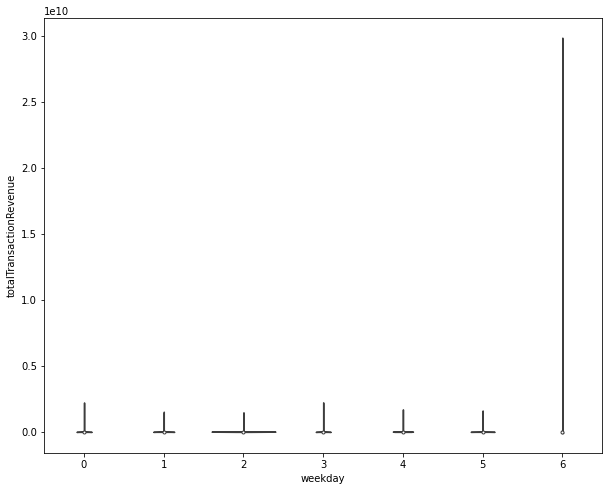

In [59]:
# all transactions
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

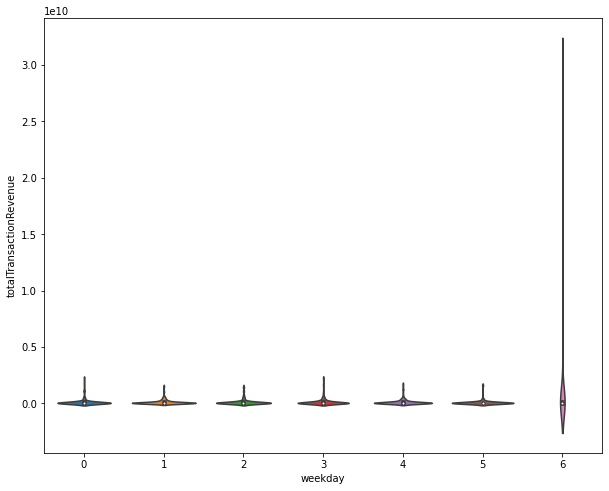

In [60]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

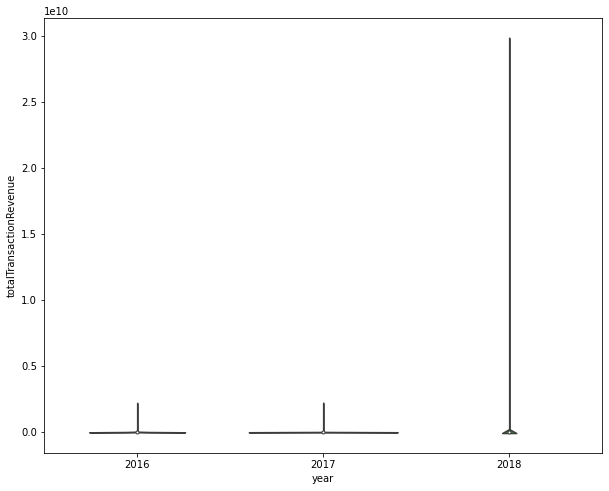

In [61]:
# all transactions
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

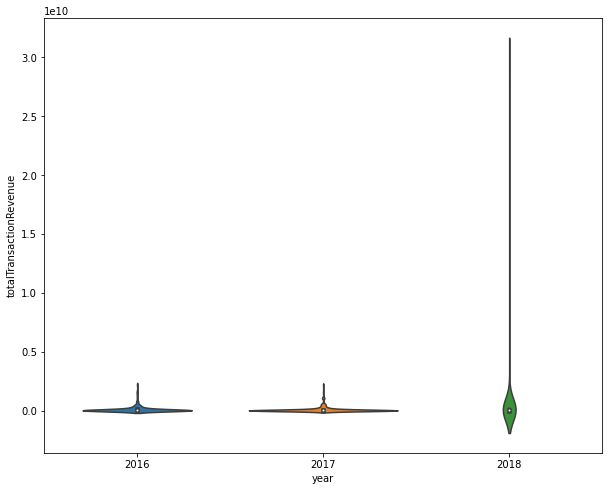

In [62]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

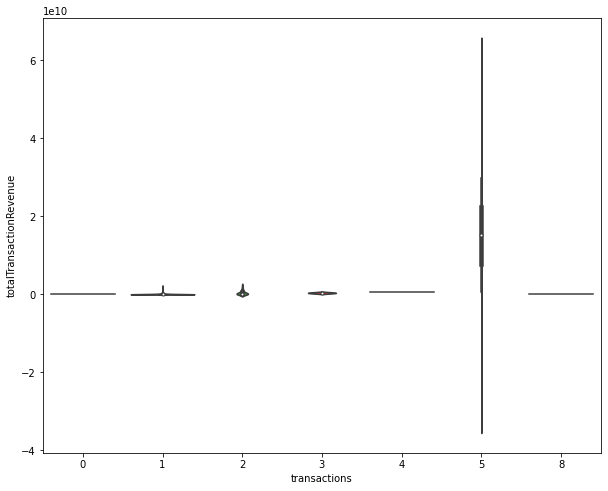

In [63]:
# all transactions
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

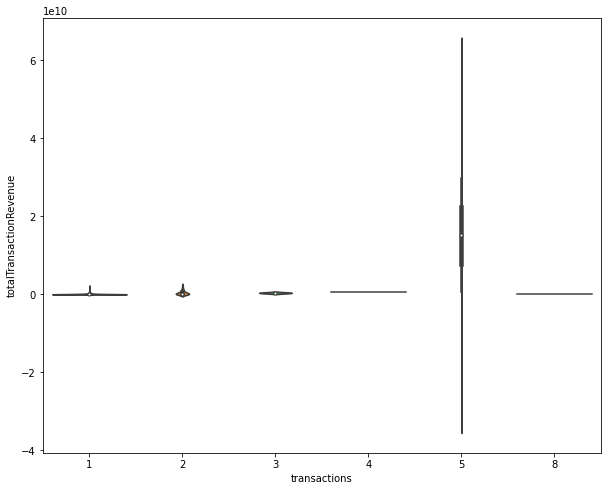

In [64]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='continent', ylabel='totalTransactionRevenue'>

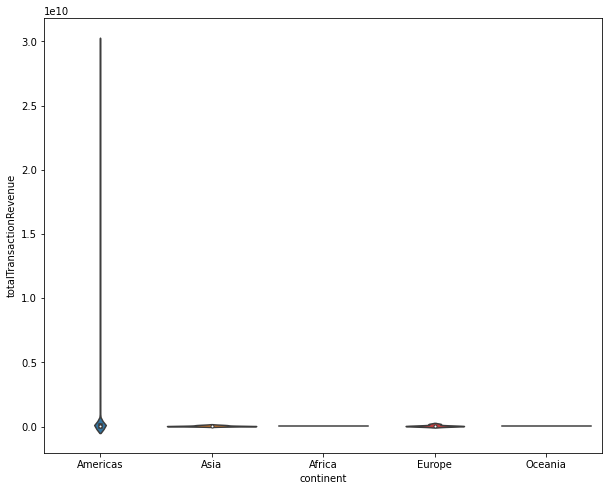

In [65]:
# none zero transactions revenue
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df_none_zero, x = 'continent', y = 'totalTransactionRevenue')

In [84]:
df.to_csv('df.csv', index=False)